<a href="https://colab.research.google.com/github/ArvindRajen/Conceptual_Analysis/blob/main/Hotel_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1


In [ ]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')



In [ ]:
print(os.listdir("/content"))
df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head()

['.config', 'Hotel_Reviews.csv', 'sample_data']


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
df.shape

(515738, 17)

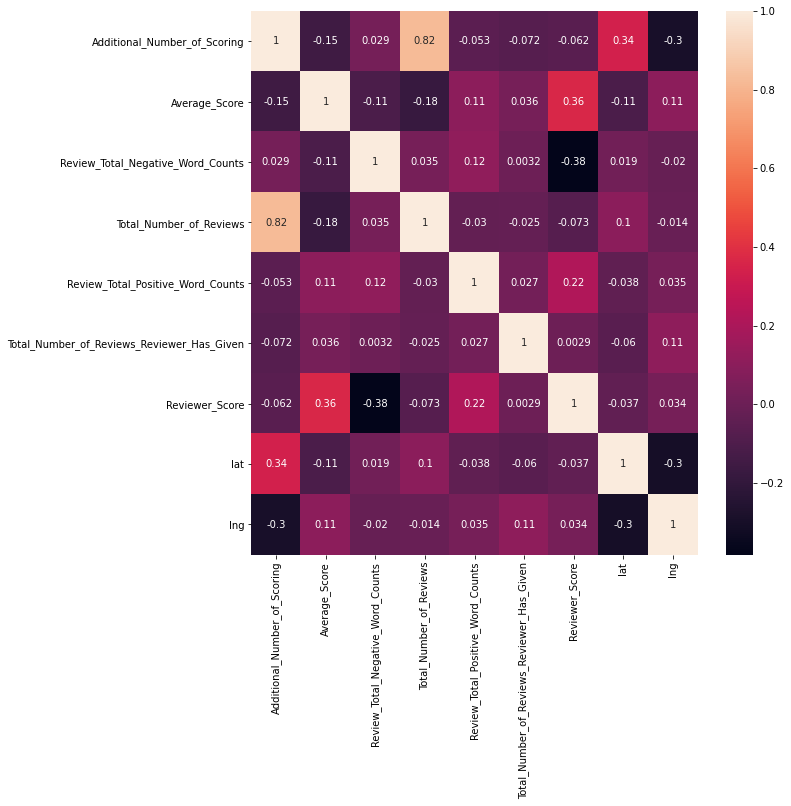

In [ ]:
df.corr()

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax) 

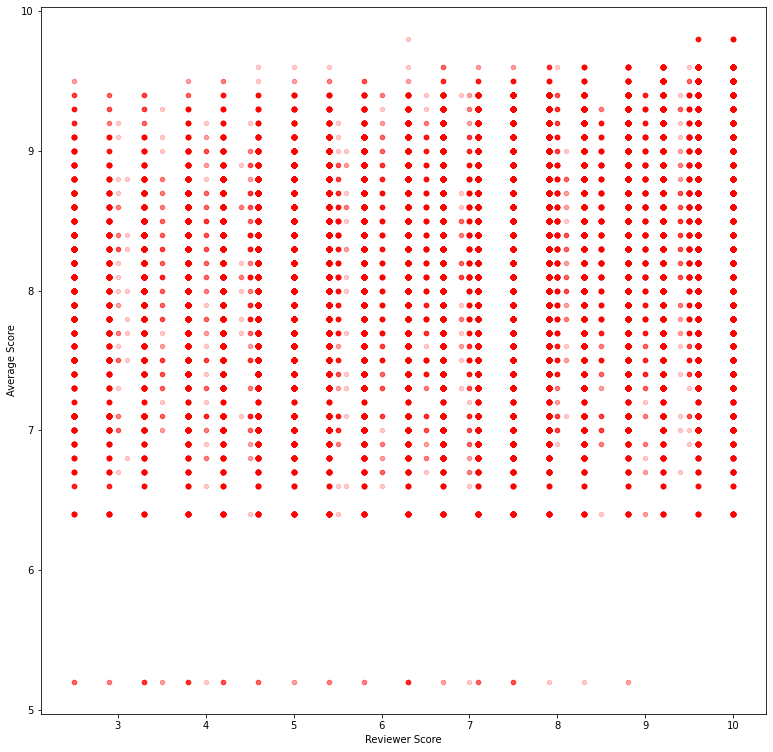

In [ ]:
df.plot(kind='scatter',x='Reviewer_Score',y='Average_Score',alpha=0.2,color='red',figsize=(13,13))
plt.xlabel('Reviewer Score')
plt.ylabel('Average Score')
plt.show()

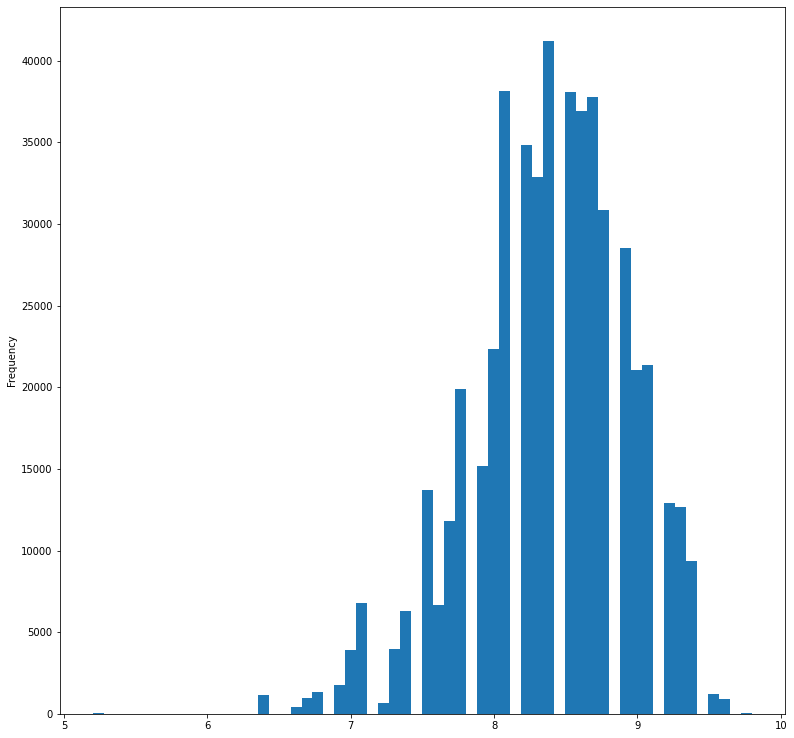

In [ ]:
df.Average_Score.plot(kind='hist',bins=60,figsize=(13,13))
plt.show()

In [ ]:
df_tight=df[(df.Average_Score>=7.9) & (df.Average_Score<=9.1)]
df_tight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399202 entries, 405 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               399202 non-null  object 
 1   Additional_Number_of_Scoring                399202 non-null  int64  
 2   Review_Date                                 399202 non-null  object 
 3   Average_Score                               399202 non-null  float64
 4   Hotel_Name                                  399202 non-null  object 
 5   Reviewer_Nationality                        399202 non-null  object 
 6   Negative_Review                             399202 non-null  object 
 7   Review_Total_Negative_Word_Counts           399202 non-null  int64  
 8   Total_Number_of_Reviews                     399202 non-null  int64  
 9   Positive_Review                             399202 non-null  object 

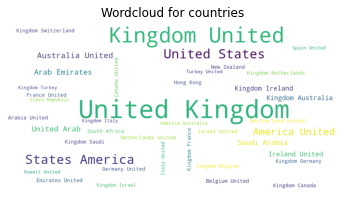

In [ ]:
text = ""
for i in range(df_tight.shape[0]):
    text = " ".join([text,df_tight["Reviewer_Nationality"].values[i]])


wordcloud = WordCloud(background_color='white', width=1200, height=600, max_font_size=90, max_words=40).generate(text)
wordcloud.recolor(random_state=312)
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

In [ ]:
df[df.Average_Score >= 5.][['Hotel_Name','Average_Score',
                            'Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
54717,Ritz Paris,9.8,122
402244,H10 Casa Mimosa 4 Sup,9.6,454
185602,41,9.6,244
398945,Hotel The Serras,9.6,604
176997,H tel de La Tamise Esprit de France,9.6,166
316447,Hotel Casa Camper,9.6,732
14708,Haymarket Hotel,9.6,255
390999,Ham Yard Hotel,9.5,314
312809,Mercer Hotel Barcelona,9.5,362
81101,Le Narcisse Blanc Spa,9.5,222


We need to know how many hotels we are looking at so :

In [ ]:
print(df.Hotel_Name.nunique(), 'hotels in the dataset')

1492 hotels in the dataset


Now that we know there *1492* Hotels in the data set we now look at the average reviews of the hotel. 

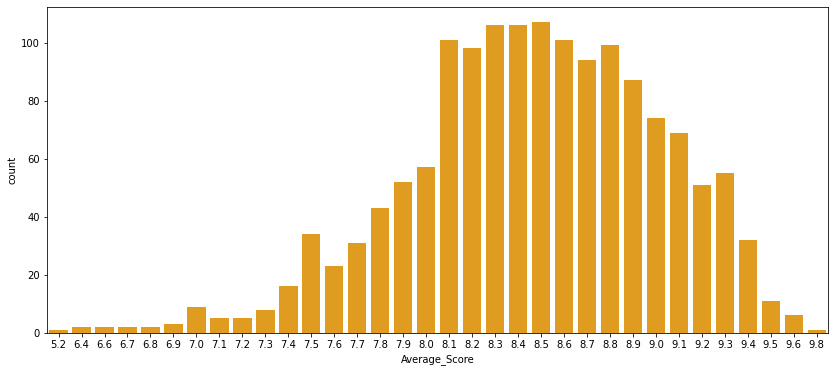

In [ ]:
df_uni = df[['Hotel_Name','Average_Score']].drop_duplicates()
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df_uni,color = 'orange')

This is interesting as the average scores indicate that most reviews lie between 8 - 9, meaning that the hotels within the dataset are generally pretty good but we know that the human mind is a thing of many intricacies and words can sometimes convey a different meaning to when we use numbers

In [ ]:
df.Average_Score.describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

We can see very clearly from the upper image and the table, most of reviews stay the rightside of 8.1. If a hotel's Avg_score is under 8.1, that means it only wins 25% competitors.

Making the State Column in the DataFrame and USing it to group Hotels by State.

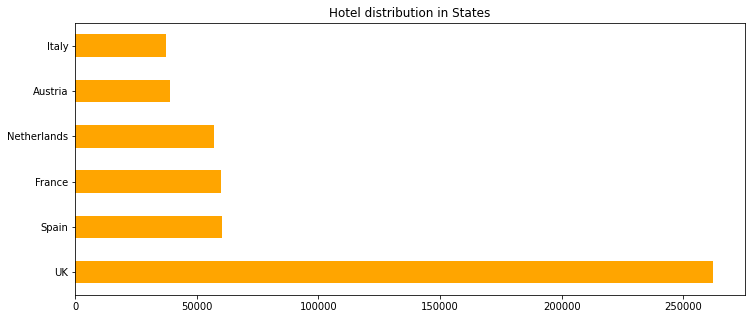

In [ ]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['State'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
# Now we can check distribution in  and in state
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in States')
df.State.value_counts().plot.barh(color = 'orange')

Let's define the popular hotels are above 8.8 Avg_score and with the most reviews.

And then, we find the best and worst hotels in specific city, how about Amsterdam and Paris?


In [ ]:
#Top 15 Popular hotels
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score',
                             'Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15]


,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


In [ ]:
#split city
df['City']= df.Hotel_Address.apply(lambda x: x.split(' ')[-2])
# find the best 10 hotels in Amsterdam
df[(df.Average_Score >= 9.0) & (df.City == 'Amsterdam')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score
341657,Waldorf Astoria Amsterdam,9.5
270116,Pillows Anna van den Vondel Amsterdam,9.4
356072,The Toren,9.4
393386,Luxury Suites Amsterdam,9.3
421334,Andaz Amsterdam Prinsengracht A Hyatt Hotel,9.3
340344,The Hoxton Amsterdam,9.3
340753,Ambassade Hotel,9.3
355888,Canal House,9.3
393615,Sofitel Legend The Grand Amsterdam,9.2
469602,Conservatorium Hotel,9.2


In [ ]:
# find the worst 10 hotels in Paris
df[(df.Average_Score <= 8.1) & (df.City == 'Paris')][['Hotel_Name','Average_Score']].drop_duplicates().sort_values(by ='Average_Score',ascending = True)[:10]

,Hotel_Name,Average_Score
68936,Villa Eugenie,6.8
209504,Villa Lut ce Port Royal,7.0
218258,Hotel Royal Elys es,7.0
135430,Hyatt Regency Paris Etoile,7.1
22189,Holiday Inn Paris Montparnasse Pasteur,7.1
220893,Amarante Beau Manoir,7.2
206499,Mercure Paris Champs Elys es,7.2
229326,Best Western Hotel Montmartre Sacr Coeur,7.2
3813,Kube Hotel Ice Bar,7.2
168654,H tel De Castiglione,7.2


In [ ]:
df_com = df[['Hotel_Name','Reviewer_Score','Negative_Review','Review_Total_Negative_Word_Counts','Positive_Review','Review_Total_Positive_Word_Counts',
             'Total_Number_of_Reviews','Total_Number_of_Reviews_Reviewer_Has_Given']]

In [ ]:
# Create NLP and machine learning environment

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

#NLP prepross neg and pos reviews
neg = []
for i in df_com['Negative_Review']:
    letters = re.sub('[^a-zA-Z]',' ',i)
    tokens = nltk.word_tokenize(letters)
    lowercase = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lowercase))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
    neg.append(' '.join(lemmas))
    
pos = []
for i in df_com['Positive_Review']:
    pletters = re.sub('[^a-zA-Z]',' ',i)
    ptokens = nltk.word_tokenize(pletters)
    plowercase = [l.lower() for l in ptokens]
    filtered_presult = list(filter(lambda l: l not in stop_words, plowercase))
    plemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_presult] 
    pos.append(' '.join(plemmas))



In [ ]:
#Finding most important words in Negative Reviews and in Postive Reviews
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(neg)
temp_counts = most_negative_words.sum(axis=0)
temp_words = cv.vocabulary_
print('the most important words in Negative Reviews:')
print('--------------------------------------------')
display(temp_words)

print('                                          ')
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv.fit_transform(pos)
temp1_counts = most_positive_words.sum(axis=0)
temp1_words = cv.vocabulary_
print('the most important words in Positive Reviews:')
print('--------------------------------------------')
temp1_words

the most important words in Negative Reviews:
--------------------------------------------


{'air conditioning': 0,
 'bit small': 1,
 'booking com': 2,
 'breakfast expensive': 3,
 'breakfast included': 4,
 'breakfast room': 5,
 'double bed': 6,
 'double room': 7,
 'hotel room': 8,
 'little bit': 9,
 'mini bar': 10,
 'room bit': 11,
 'room little': 12,
 'room room': 13,
 'room service': 14,
 'room small': 15,
 'small room': 16,
 'star hotel': 17,
 'tea coffee': 18,
 'wi fi': 19}

                                          
the most important words in Positive Reviews:
--------------------------------------------


{'bed comfortable': 0,
 'breakfast good': 1,
 'clean room': 2,
 'comfortable bed': 3,
 'comfortable room': 4,
 'comfy bed': 5,
 'excellent location': 6,
 'friendly helpful': 7,
 'friendly staff': 8,
 'good breakfast': 9,
 'good location': 10,
 'great location': 11,
 'helpful staff': 12,
 'location excellent': 13,
 'location good': 14,
 'location great': 15,
 'room clean': 16,
 'staff friendly': 17,
 'staff helpful': 18,
 'walking distance': 19}

In [ ]:
df_com['+'] = 1
df_com['-'] = 1
df_com['+'] = df_com.apply(lambda x: 0 if x["Positive_Review"] == 'No Positive' else x['+'],axis =1)
df_com['-'] = df_com.apply(lambda x: 0 if x["Negative_Review"] == 'No Negative' else x['-'],axis =1)
counted_reviews = pd.DataFrame(df_com.groupby(['Hotel_Name'])['+','-','Total_Number_of_Reviews_Reviewer_Has_Given'].sum())
counted_reviews['Total'] = counted_reviews['+'] +counted_reviews['-']
counted_reviews['Neg_rate'] = round(counted_reviews['-'] / counted_reviews['Total'],2)
counted_reviews['Neg_rate'].describe()

counted_reviews[counted_reviews.Neg_rate > 0.5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,+,-,Total_Number_of_Reviews_Reviewer_Has_Given,Total,Neg_rate
Hotel_Name,,,,,
AC Hotel Irla a Marriott Lifestyle Hotel,12,13,148,25,0.52
BEST WESTERN Maitrise Hotel Maida Vale,695,732,5023,1427,0.51
Best Western Maitrise Hotel Edgware Road,175,203,901,378,0.54
Britannia International Hotel Canary Wharf,4099,4262,22855,8361,0.51
Gran Hotel Barcino,66,73,385,139,0.53
Hallmark Hotel London Chigwell Prince Regent,384,415,2319,799,0.52
Hotel Liberty,51,64,395,115,0.56
Ibis Styles Milano Palmanova,9,11,37,20,0.55
Idea Hotel Milano San Siro,393,419,4132,812,0.52


In [ ]:
df[df.Hotel_Name == 'Hotel Liberty'][['Positive_Review','Negative_Review','Average_Score']]

,Positive_Review,Negative_Review,Average_Score
494791,No Positive,The room is really dirty dirt and dust are ev...,5.2
494792,Good location quiet if rooms are on the inter...,There is no wi fi in the rooms and no air con...,5.2
494793,Great location with public transport links on...,The hotel was advertised with air conditionin...,5.2
494794,Tram lines,There was no hot water in my room and staff w...,5.2
494795,Breakfast was good,NO wifi in room You have to go to portal for ...,5.2
...,...,...,...
494851,No Positive,It feels like a 2 star hotel masquerading as ...,5.2
494852,Quiet area good breakfast and nice clean hotel,Air con was ineffective so it was pretty warm...,5.2
494853,No Positive,pas de chaines internationales,5.2
494854,V friendly staff,Ac not good,5.2


#Part 2

In [ ]:
# read data
reviews_df = pd.read_csv("/content/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [ ]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_access,word_air,word_also,word_although,word_always,word_amaze,word_area,word_around,word_arrive,word_ask,word_available,word_back,word_bad,word_bar,word_bathroom,word_beautiful,word_bed,word_bedroom,word_best,word_big,word_bit,word_book,word_breakfast,word_buffet,word_center,word_central,...,word_service,word_shower,word_size,word_sleep,word_small,word_space,word_spacious,word_staff,word_standard,word_station,word_stay,word_still,word_street,word_super,word_take,word_tea,word_thing,word_think,word_though,word_time,word_tiny,word_transport,word_tube,word_two,word_upgrade,word_use,word_view,word_visit,word_wait,word_walk,word_wall,word_warm,word_water,word_welcome,word_well,word_wifi,word_window,word_wonderful,word_work,word_would
328097,Nothing about the hotel or staff but we would...,0,nothing hotel staff pay allege full price help...,0.000,0.605,0.395,0.9513,186,35,-0.102829,-0.021603,-0.015614,-0.020253,0.133499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.321061,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49342,Duty manager in the night takes to me rude an...,0,duty manager night take rude behave unexceptab...,0.281,0.719,0.000,-0.6240,89,16,0.008803,-0.070390,-0.036180,0.074577,0.099873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.76203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402177,Limited options in room service menu Great lo...,0,limited option room service menu great locatio...,0.117,0.432,0.451,0.7506,67,11,-0.068214,-0.087985,0.000262,0.039154,0.105491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.594242,0.0,0.0,0.0,0.0,0.000000,0.000000,0.291094,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196605,Good use of space,0,good use space,0.000,0.508,0.492,0.4404,19,6,-0.087023,0.008479,0.033745,0.035224,-0.009246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.701462,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.601504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328156,The room was spacious and so was the bed espe...,0,room spacious bed especially europe even eleva...,0.000,0.789,0.211,0.6808,133,27,-0.010574,-0.106462,0.098960,-0.090098,-0.035262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.428939,0.000000,0.0,0.0,0.336285,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
reviews_df.shape

(516, 185)

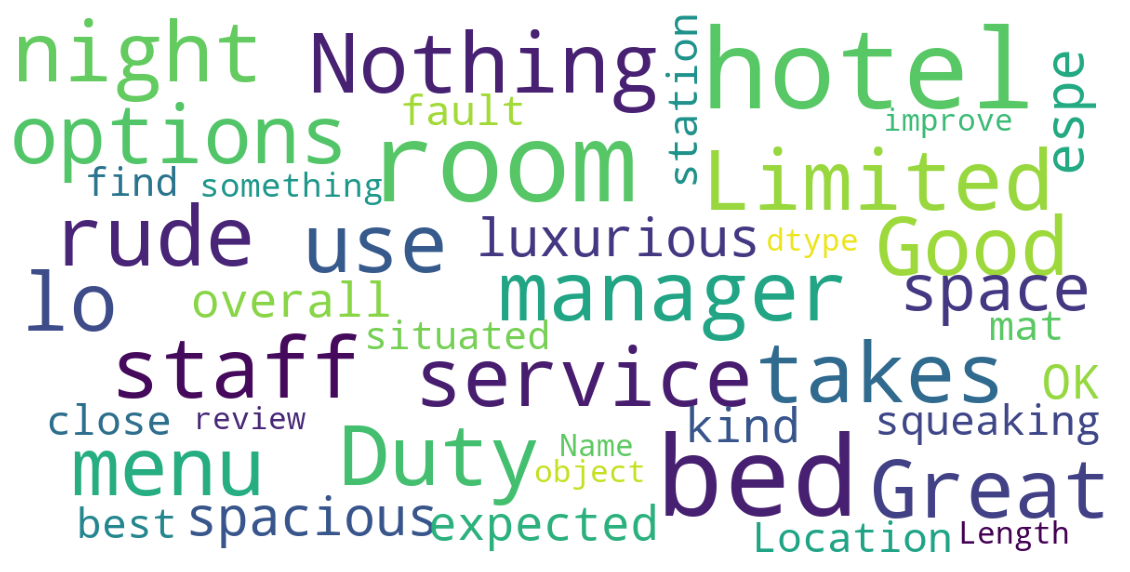

In [ ]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
207666,Very clean friendly hotel,0.764
238998,Room clean and comfortable Good location,0.748
499846,Super helpful staff great location good break...,0.737
235414,Great location Fantastic facilities Would 100...,0.728
91505,Excellent Location Great Rooftop Bar,0.722
128667,Staff very friendly and helpful Excellent Bre...,0.719
465544,Nil Excellent breakfast Helpful staff Excelle...,0.718
241670,Friendly staff clean and nice room Comfortabl...,0.713
352152,The garden was lovely peaceful and romantic,0.708
359280,Enjoyable stay great location and good facili...,0.703


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
29666,A bit noisy No,0.796
394666,Not great location Clean functional,0.649
68963,Too noisy Too noisy,0.630
101936,not much not to like Great hotel,0.519
265719,Unhelpful staff Poor internet,0.508
171548,Nothing Excellent staff service Excellent fac...,0.457
207946,Terrible building and overpricec Staff,0.437
499952,nothing Super helpful staff great location,0.436
125758,Nothing Brilliant all round stay,0.434
37364,Nothing Very nice a good mix of old and new,0.424


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


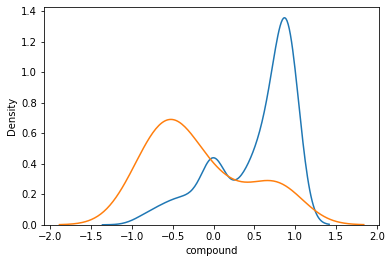

In [ ]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.054820
0,neg,0.052591
149,word_staff,0.045406
9,doc2vec_vector_3,0.034001
162,word_tiny,0.032376
5,nb_words,0.031636
10,doc2vec_vector_4,0.031070
1,neu,0.031019
4,nb_chars,0.030635
6,doc2vec_vector_0,0.027447


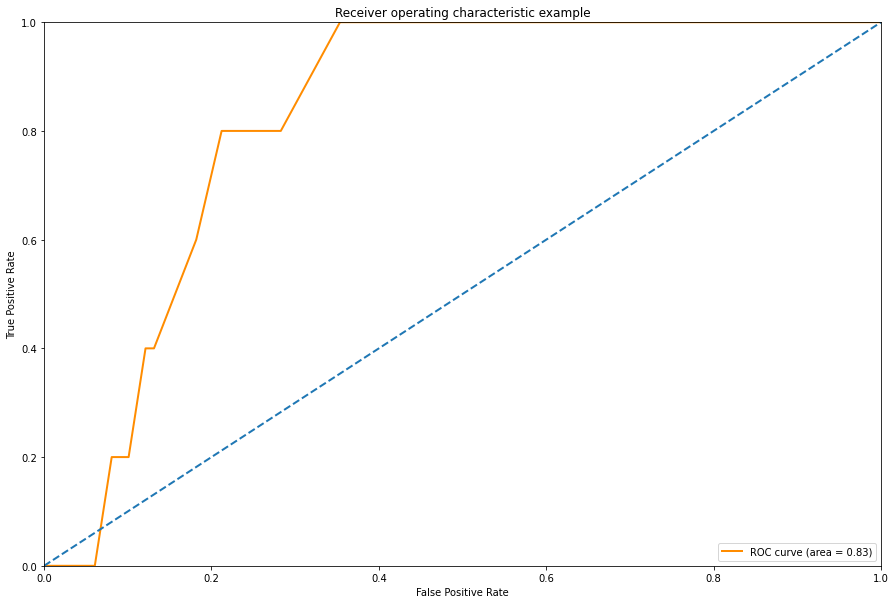

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()